# Visualization of dataframe

## Imports and read data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from statsmodels.tsa.stattools import adfuller,kpss
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.deterministic import Fourier
# from statsmodels.graphics.tsaplots import plot_pacf
# import statsmodels.api as sm

In [3]:
# Load data
df = pd.read_csv('../data/daily_merged_hydro_climate.csv')

## Adjust dataframe

- convert date to datetime format
- remove some features
- calculate wind direction and speed
- rename columns

### Datetime

In [4]:
df['date'] = pd.to_datetime(df['date'])
print(df.date.max())
print(df.date.min())

2024-09-23 00:00:00
2023-06-03 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136409 entries, 0 to 136408
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            136409 non-null  datetime64[ns]
 1   Source                          136409 non-null  object        
 2   current_mean                    136409 non-null  float64       
 3   current_max                     136409 non-null  float64       
 4   current_std                     136409 non-null  float64       
 5   power_factor_mean               136409 non-null  float64       
 6   kwh_sum                         136409 non-null  float64       
 7   Temperature (°C)_mean           136409 non-null  float64       
 8   Temperature (°C)_min            136409 non-null  float64       
 9   Temperature (°C)_max            136409 non-null  float64       
 10  Dewpoint Temperature (°C)_mean  136409 non-null  float64

### Rename columns

In [6]:
df = df.rename(columns={
    "Temperature (°C)_mean": "temp_mean",
    "Temperature (°C)_min": "temp_min",
    "Temperature (°C)_max": "temp_max",
    "Dewpoint Temperature (°C)_mean": "dew_point_mean",
    "Dewpoint Temperature (°C)_min": "dew_point_min",
    "Dewpoint Temperature (°C)_max": "dew_point_max",
    "U Wind Component (m/s)_mean": "u",
    "V Wind Component (m/s)_mean": "v",
    "Total Precipitation (mm)_sum": "tot_precip",
    "Snowfall (mm)_sum": "snowfall",
    "Snow Cover (%)_mean": "snow_cover"
    })

### Calculate wind direction and speed

In [7]:
# calculate wind direction and speed
def wind_convert(u, v):

    speed = np.sqrt(u**2 + v**2)
    direction = np.arctan2(-u, -v)
    direction2 = direction * 180/np.pi

    return direction, direction2, speed

In [8]:
x, y, z = wind_convert(df.u, df.v)
df['direction'] = x
df['wind_degree'] = y
df['wind_speed'] = z

### Remove features

In [9]:
# cut features and rename column names
df_short = df[[x for x in df.columns if x not in['Source', 'consumer_device', 'data_user', 'is_red', 'is_blue', 'is_yellow', 'direction', 'kwh_sum_q25', 'kwh_sum_q75', 'current_mean_q25', 'current_mean_q75', 'voltage_value_q25', 'voltage_value_q75', 'power_factor_mean_q25', 'power_factor_mean_q75']]].copy()


In [10]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136409 entries, 0 to 136408
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               136409 non-null  datetime64[ns]
 1   current_mean       136409 non-null  float64       
 2   current_max        136409 non-null  float64       
 3   current_std        136409 non-null  float64       
 4   power_factor_mean  136409 non-null  float64       
 5   kwh_sum            136409 non-null  float64       
 6   temp_mean          136409 non-null  float64       
 7   temp_min           136409 non-null  float64       
 8   temp_max           136409 non-null  float64       
 9   dew_point_mean     136409 non-null  float64       
 10  dew_point_min      136409 non-null  float64       
 11  dew_point_max      136409 non-null  float64       
 12  u                  136409 non-null  float64       
 13  v                  136409 non-null  float64 

## Aggregate per day

- percentiles of energy data

In [11]:
df_vis = df_short.groupby(['date']).agg({
    "kwh_sum": [("q50", lambda x: x.quantile(0.50)), ("q25", lambda x: x.quantile(0.25)), ("q75", lambda x: x.quantile(0.75))],
    "current_mean": [("q50", lambda x: x.quantile(0.50)), ("q25", lambda x: x.quantile(0.25)), ("q75", lambda x: x.quantile(0.75))],
    "current_std": [("q50", lambda x: x.quantile(0.50)), ("q25", lambda x: x.quantile(0.25)), ("q75", lambda x: x.quantile(0.75))],
    "current_max": [("q50", lambda x: x.quantile(0.50)), ("q25", lambda x: x.quantile(0.25)), ("q75", lambda x: x.quantile(0.75))],
    "voltage_value": [("q50", lambda x: x.quantile(0.50)), ("q25", lambda x: x.quantile(0.25)), ("q75", lambda x: x.quantile(0.75))],
    "power_factor_mean": [("q50", lambda x: x.quantile(0.50)), ("q25", lambda x: x.quantile(0.25)), ("q75", lambda x: x.quantile(0.75))],
    "temp_mean": [("", lambda x: x.quantile(0.50))],
    "temp_min": [("", lambda x: x.quantile(0.50))],
    "temp_max": [("", lambda x: x.quantile(0.50))],
    "dew_point_mean": [("", lambda x: x.quantile(0.50))],
    "dew_point_max": [("", lambda x: x.quantile(0.50))],
    "dew_point_min": [("", lambda x: x.quantile(0.50))],
    "u": [("", lambda x: x.quantile(0.50))],
    "v": [("", lambda x: x.quantile(0.50))],
    "tot_precip": [("", lambda x: x.quantile(0.50))],
    "snowfall": [("", lambda x: x.quantile(0.50))],
    "snow_cover": [("", lambda x: x.quantile(0.50))],
    "wind_degree": [("", lambda x: x.quantile(0.50))],
    "wind_speed": [("", lambda x: x.quantile(0.50))]
})

# Flatten MultiIndex columns
df_vis.columns = [f"{col}_{stat}" for col, stat in df_vis.columns]
df_vis.columns = df_vis.columns.str.rstrip('_')

In [12]:
df_vis['temp_mean_mov_avg'] = df_vis.temp_mean.rolling(window=7).mean()
df_vis['temp_min_mov_avg'] = df_vis.temp_min.rolling(window=7).mean()
df_vis['temp_max_mov_avg'] = df_vis.temp_max.rolling(window=7).mean()

In [13]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 479 entries, 2023-06-03 to 2024-09-23
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kwh_sum_q50            479 non-null    float64
 1   kwh_sum_q25            479 non-null    float64
 2   kwh_sum_q75            479 non-null    float64
 3   current_mean_q50       479 non-null    float64
 4   current_mean_q25       479 non-null    float64
 5   current_mean_q75       479 non-null    float64
 6   current_std_q50        479 non-null    float64
 7   current_std_q25        479 non-null    float64
 8   current_std_q75        479 non-null    float64
 9   current_max_q50        479 non-null    float64
 10  current_max_q25        479 non-null    float64
 11  current_max_q75        479 non-null    float64
 12  voltage_value_q50      479 non-null    float64
 13  voltage_value_q25      479 non-null    float64
 14  voltage_value_q75      479 non-null    

## Visualization
### Standart features

### Heatmap and pairplot

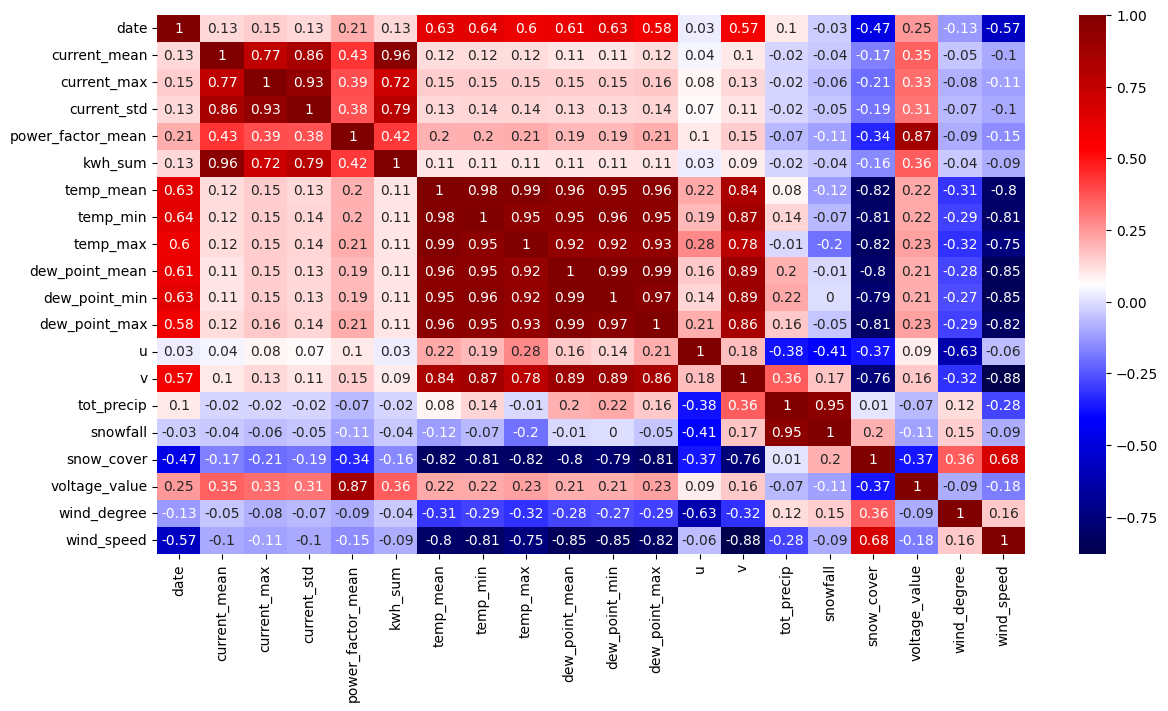

In [14]:
plt.figure(figsize=(14, 7))
sns.heatmap(df_short.corr().round(2), annot=True, cmap='seismic')
plt.show()

In [15]:
#sns.pairplot(df_short, diag_kind='kde')

In [16]:
def plot_tseries_2_fill(x,
                        y1=None,
                        y2=None,
                        y1_fill_lower=None,
                        y1_fill_upper=None,
                        y1_scaling=None,
                        y2_fill_lower=None,
                        y2_fill_upper=None,
                        y2_scaling=None,
                        zero_hline=False,
                        y1_unit='',
                        y2_unit='',
                        title=''
                        ):
    """Plot time series of up to two variables with fill between ranges."""
    fig, ax1 = plt.subplots(figsize=(14, 5))
    if y1_fill_lower is not None and y1_fill_upper is not None:
        ax1.fill_between(x, y1_fill_lower, y1_fill_upper, facecolors='grey', alpha=0.5, label='inner quartiles')
    if y1 is not None:
        ax1.plot(x, y1, 'k-', label='median')
    if y1_scaling is not None:
        ax1.set_yscale(y1_scaling, linthresh=0.1)
        ax1.set_ylim(0)
    ax1.set_ylabel(y1_unit)
    ax1.tick_params(rotation=30)
    if y2 is not None or (y2_fill_lower is not None and y2_fill_upper is not None):
        ax2 = ax1.twinx()
        if y2_fill_lower is not None and y2_fill_upper is not None :
            ax2.fill_between(x, y2_fill_lower, y2_fill_upper, facecolors='skyblue', alpha=0.5, label='inner quartiles')
        if y2 is not None: 
            ax2.plot(x, y2, 'b-')
        if y2_scaling is not None:
            ax2.set_yscale(y1_scaling, linthresh=0.1)
            ax2.set_ylim(0)
        if zero_hline:
            ax2.hlines(0, x[0], x[-1], 'b', linestyles=':')
        ax2.set_ylabel(y2_unit)
        ax2.spines['right'].set_color('b')
        ax2.tick_params(axis='y', colors='b')
        ax2.yaxis.label.set_color('b')
    plt.xlim(x[0], x[-1])
    plt.title(title)
    plt.show()

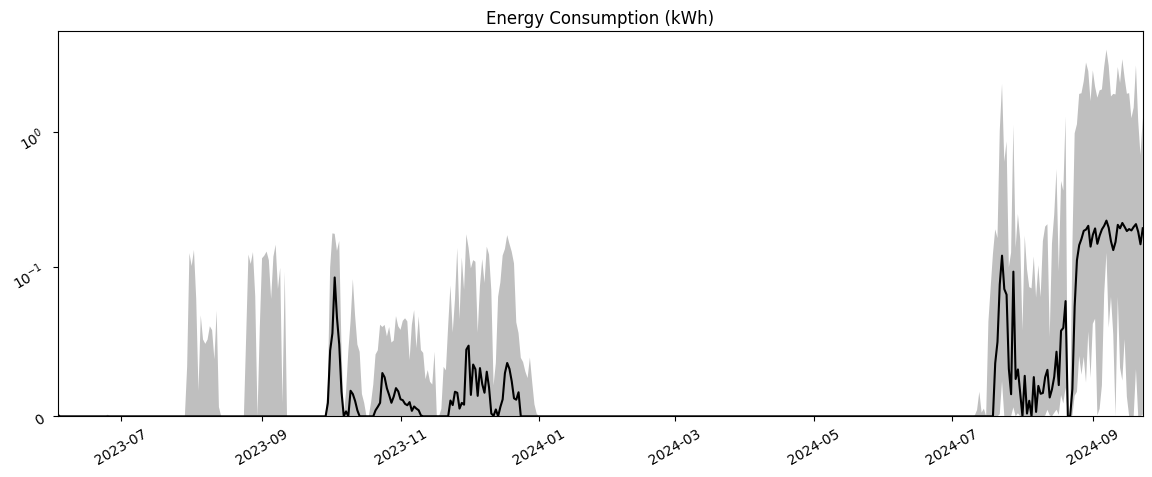

In [17]:
plot_tseries_2_fill(df_vis.index,
                    df_vis['kwh_sum_q50'].values,
                    y1_fill_lower=df_vis['kwh_sum_q25'].values,
                    y1_fill_upper=df_vis['kwh_sum_q75'].values,
                    y1_scaling='symlog',
                    title='Energy Consumption (kWh)'
                    )

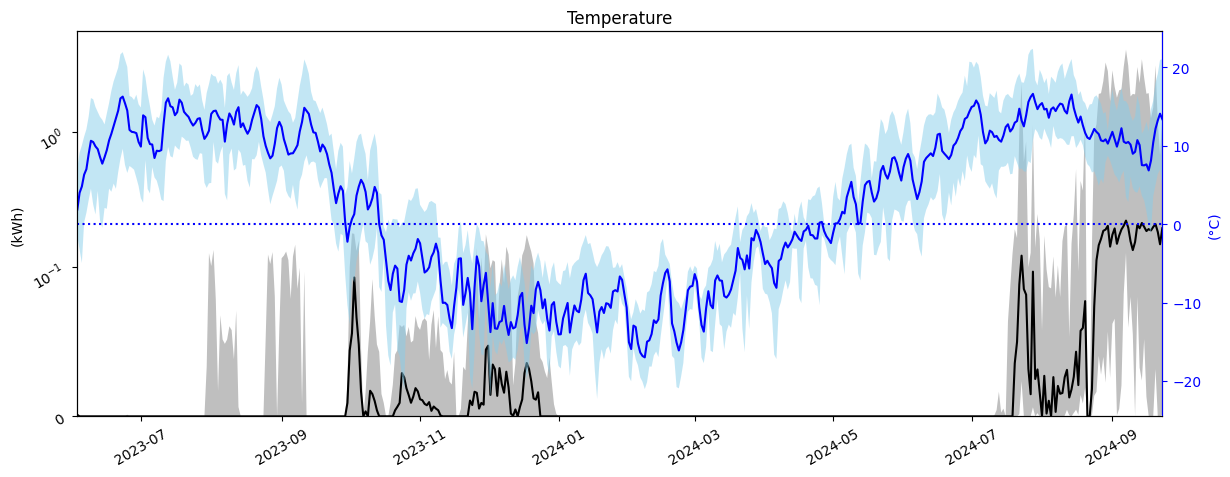

In [18]:
plot_tseries_2_fill(df_vis.index,
                    df_vis['kwh_sum_q50'].values,
                    df_vis['temp_mean'].values,
                    y1_fill_lower=df_vis['kwh_sum_q25'].values,
                    y1_fill_upper=df_vis['kwh_sum_q75'].values,
                    y1_scaling='symlog',
                    y2_fill_lower=df_vis['temp_min'].values,
                    y2_fill_upper=df_vis['temp_max'].values,
                    zero_hline=True,
                    y1_unit='(kWh)',
                    y2_unit='(°C)',
                    title='Temperature'
                    )

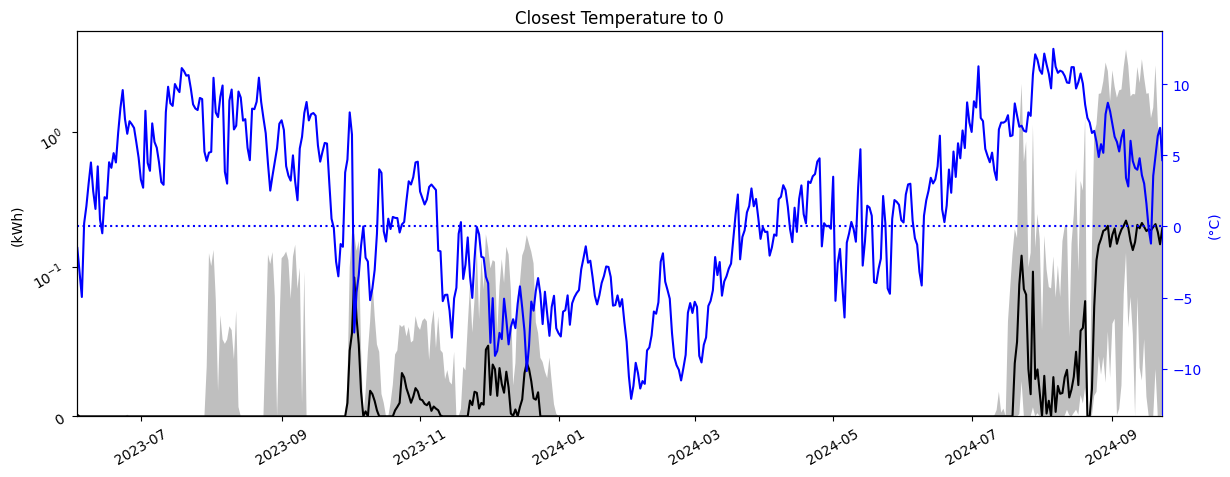

In [19]:
feature = [min(x1, x2, key=abs) for x1, x2 in zip(df_vis['temp_max'], df_vis['temp_min'])]

plot_tseries_2_fill(df_vis.index,
                    df_vis['kwh_sum_q50'].values,
                    feature,
                    y1_fill_lower=df_vis['kwh_sum_q25'].values,
                    y1_fill_upper=df_vis['kwh_sum_q75'].values,
                    y1_scaling='symlog',
                    zero_hline=True,
                    y1_unit='(kWh)',
                    y2_unit='(°C)',
                    title='Closest Temperature to 0'
                    )

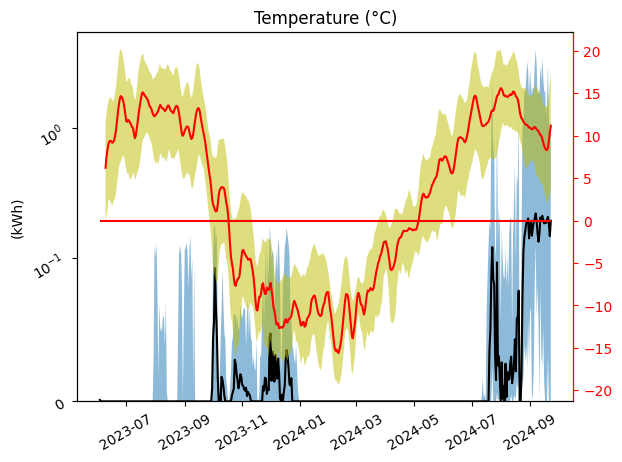

In [20]:
# plot temperature time series with moving average
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.fill_between(df_vis.kwh_sum_q25.index, df_vis['temp_min_mov_avg'].values, df_vis['temp_max_mov_avg'].values, facecolors='y', alpha=0.5, label='inner quartiles')
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['temp_mean_mov_avg'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.hlines(0, df_vis.index[0], df_vis.index[-1], 'r')
plt.title('Temperature (°C)')
plt.show()

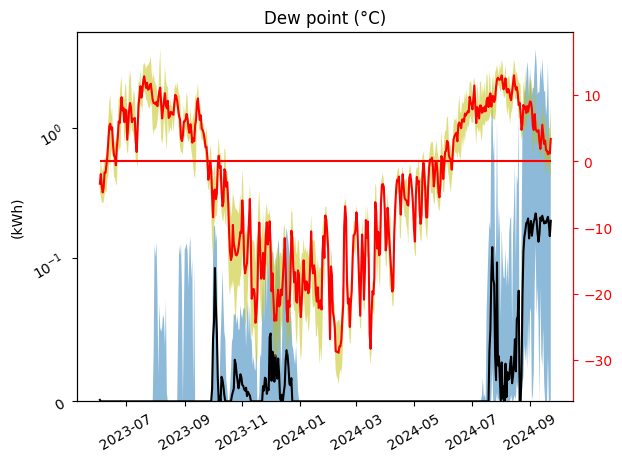

In [21]:
# plot dew point time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.fill_between(df_vis.kwh_sum_q25.index, df_vis['dew_point_min'].values, df_vis['dew_point_max'].values, facecolors='y', alpha=0.5, label='inner quartiles')
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['dew_point_mean'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.hlines(0, df_vis.index[0], df_vis.index[-1], 'r')
plt.title('Dew point (°C)')
plt.show()

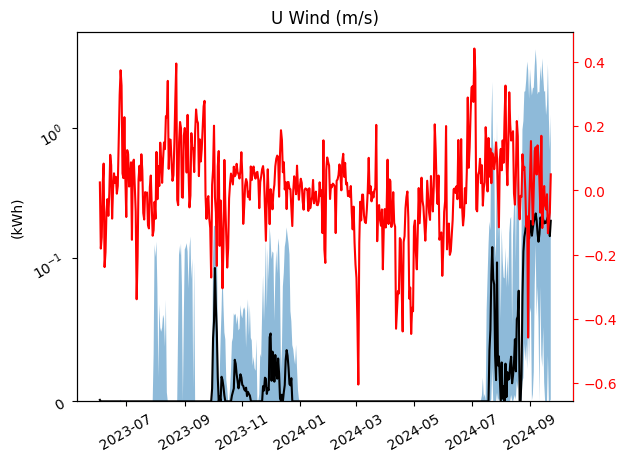

In [22]:
# plot u wind time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['u'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('U Wind (m/s)')
plt.show()

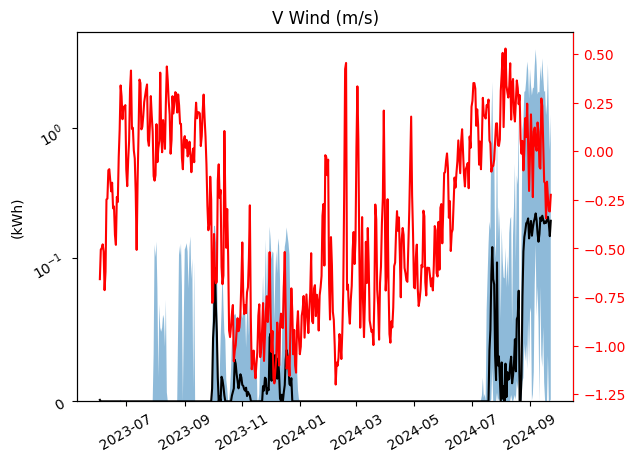

In [23]:
# plot v wind time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['v'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('V Wind (m/s)')
plt.show()

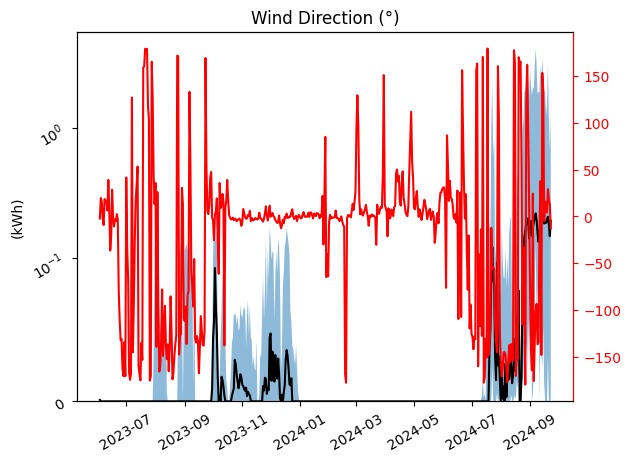

In [24]:
# plot wind direction time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['wind_degree'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('Wind Direction (°)')
plt.show()

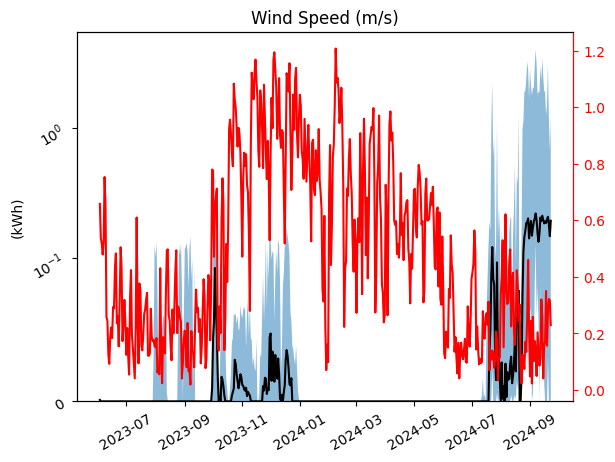

In [25]:
# plot wind speed time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['wind_speed'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('Wind Speed (m/s)')
plt.show()

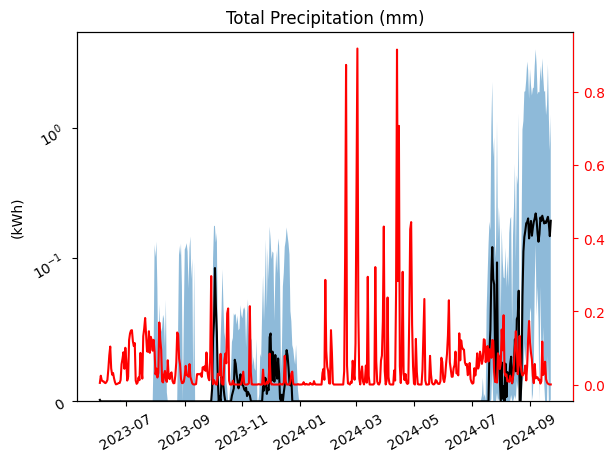

In [26]:
# plot total precipitation time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['tot_precip'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('Total Precipitation (mm)')
plt.show()

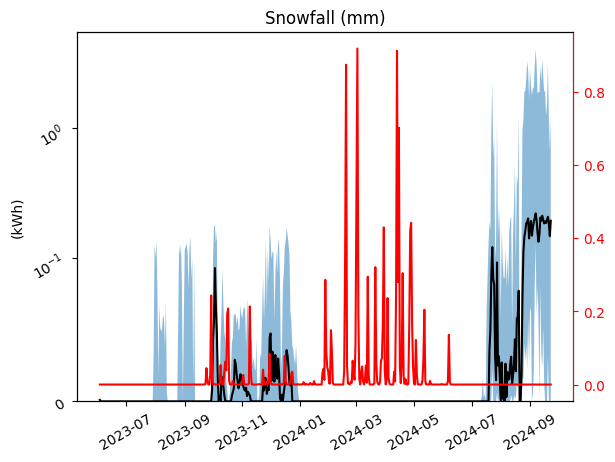

In [27]:
# plot snow fall time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['snowfall'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('Snowfall (mm)')
plt.show()

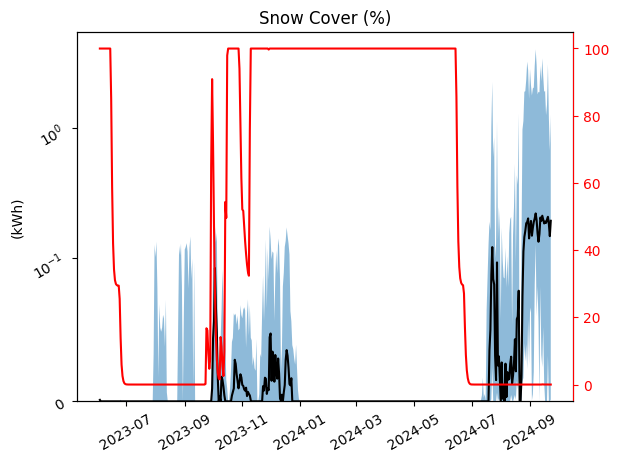

In [28]:
# plot snow cover time series
fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_vis['snow_cover'].values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('Snow Cover (%)')
plt.show()

### New features

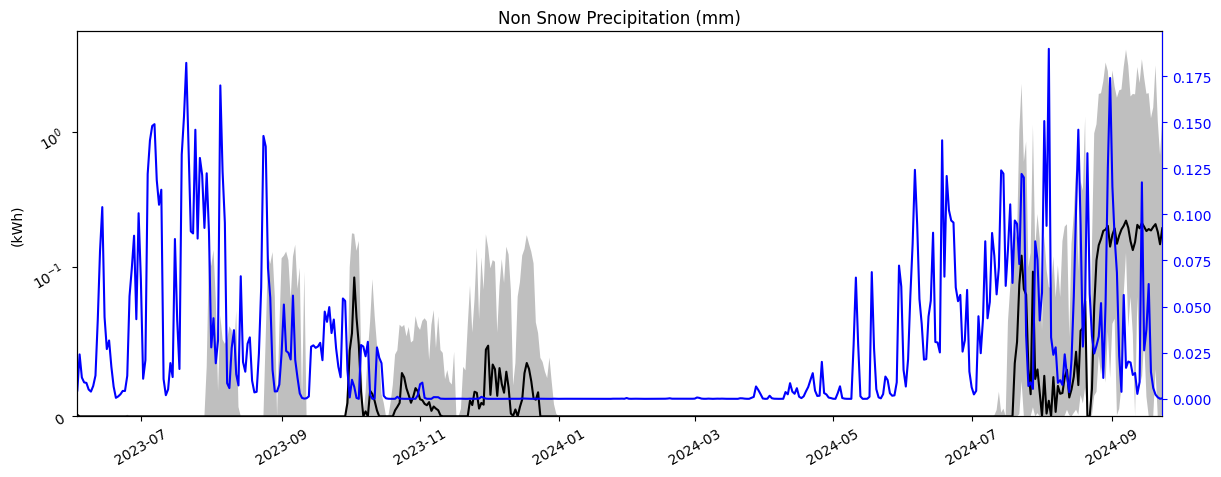

In [31]:
plot_tseries_2_fill(df_vis.index,
                    y1=df_vis['kwh_sum_q50'].values,
                    y2=df_vis.eval('feature = tot_precip - snowfall').feature.values,
                    y1_fill_lower=df_vis['kwh_sum_q25'].values,
                    y1_fill_upper=df_vis['kwh_sum_q75'].values,
                    y1_unit='(kWh)',
                    y1_scaling='symlog',
                    title='Non Snow Precipitation (mm)'
                    )

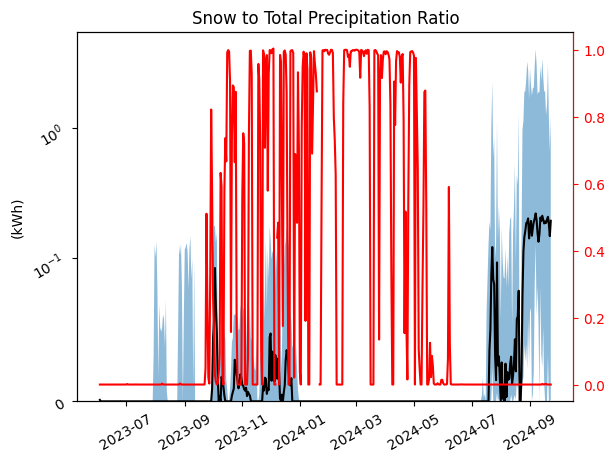

In [ ]:
# plot snow to total precipitation time series

df_feature = df_vis.eval('feature = snowfall / tot_precip').feature.copy()

fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_feature.values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('Snow to Total Precipitation Ratio')
plt.show()

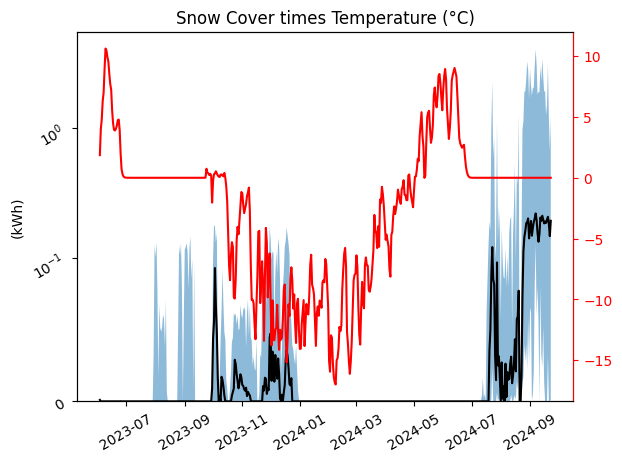

In [32]:
# plot snow times temperature time series

df_feature = df_vis.eval('feature = snow_cover/100 * temp_mean').feature.copy()

fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_feature.values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('Snow Cover times Temperature (°C)')
plt.show()

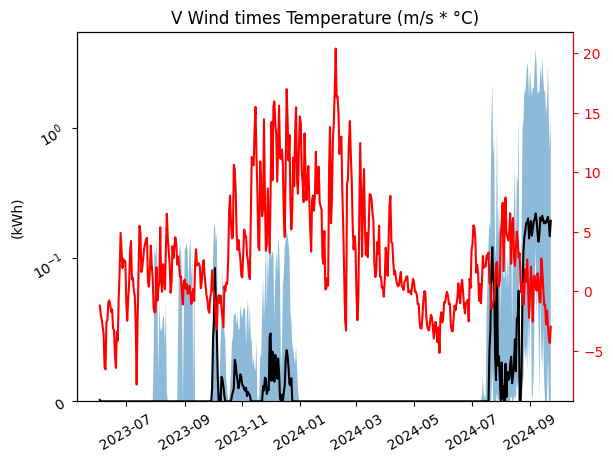

In [ ]:
# plot v times temperature time series

df_feature = df_vis.eval('feature = v * temp_mean').feature.copy()

fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_feature.values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('V Wind times Temperature (m/s * °C)')
plt.show()

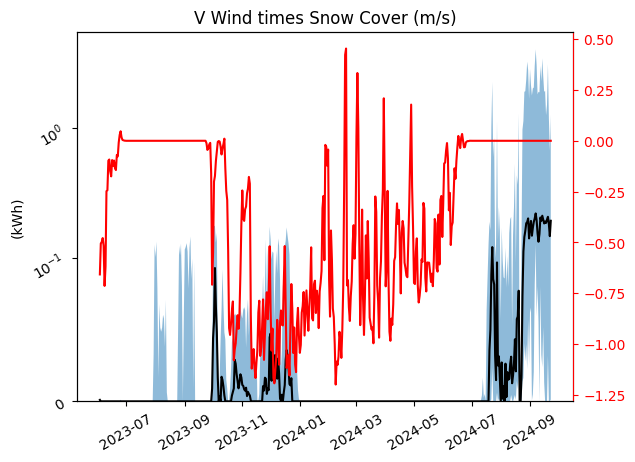

In [ ]:
# plot v times snow cover time series

df_feature = df_vis.eval('feature = v * snow_cover/100').feature.copy()

fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_feature.values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('V Wind times Snow Cover (m/s)')
plt.show()

### To do more feature engeneering, just adjust the argument of the .eval function

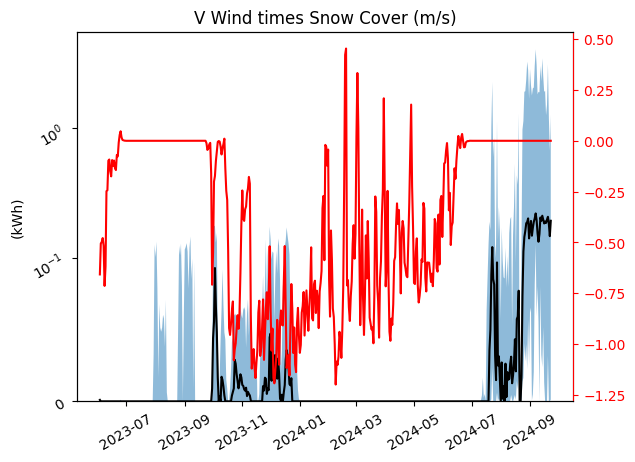

In [ ]:
# plot more time series

df_feature = df_vis.eval('feature = v * snow_cover/100').feature.copy()

fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_feature.values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('V Wind times Snow Cover (m/s)')
plt.show()

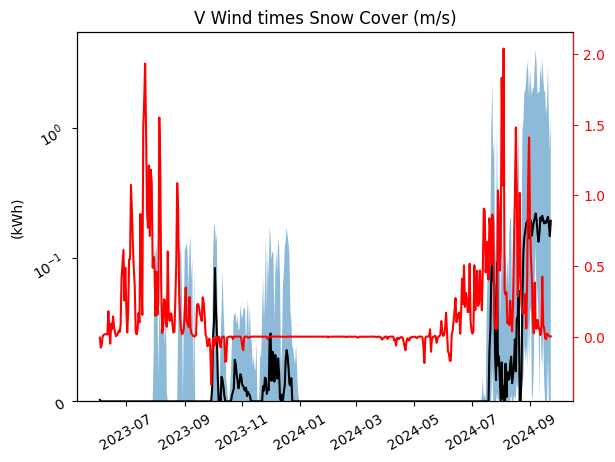

In [ ]:
# plot more time series

df_feature = df_vis.eval('feature = (tot_precip - snowfall) * temp_min').feature.copy()

fig, ax1 = plt.subplots()
ax1.fill_between(df_vis.kwh_sum_q25.index, df_vis.kwh_sum_q25.values, df_vis.kwh_sum_q75.values, alpha=0.5, label='inner quartiles')
ax1.plot(df_vis.kwh_sum_q50.index, df_vis.kwh_sum_q50.values, 'k-', label='median')
ax1.set_yscale('symlog', linthresh=0.1)
ax1.set_ylim(0)
ax1.set_ylabel('(kWh)')
ax1.tick_params(rotation=30)
ax2 = ax1.twinx()
ax2.plot(df_vis.kwh_sum_q50.index, df_feature.values, 'r-')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
plt.title('V Wind times Snow Cover (m/s)')
plt.show()